In [93]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math

In [94]:
io = r'/home/gg/2021_data/data/PR_data.xls'

In [95]:
data = pd.read_excel(io)
del(data['喜欢数学'])
del(data['喜欢模式识别'])
data=data.dropna()
data.head(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 350
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   编号       350 non-null    int64  
 1   性别 男1女0  350 non-null    int64  
 2   籍贯       350 non-null    object 
 3   身高(cm)   350 non-null    float64
 4   体重(kg)   350 non-null    float64
 5   鞋码       350 non-null    float64
 6   50米成绩    350 non-null    float64
 7   肺活量      350 non-null    float64
 8   喜欢颜色     350 non-null    object 
 9   喜欢运动     350 non-null    int64  
 10  喜欢文学     350 non-null    int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 32.8+ KB


In [96]:
male_data=data[data['性别 男1女0']>0]
female_data=data[data['性别 男1女0']<=0]

In [97]:
male_data = np.array([male_data['身高(cm)'].tolist(),
                       male_data['体重(kg)'].tolist(),
                       male_data['50米成绩'].tolist(),
                       male_data['肺活量'].tolist()]
                       ,np.float32)
female_data = np.array([female_data['身高(cm)'].tolist(),
                       female_data['体重(kg)'].tolist(),
                       female_data['50米成绩'].tolist(),
                       female_data['肺活量'].tolist()]
                       ,np.float32)

In [98]:
male_data_t=male_data.T
female_data_t=female_data.T

In [113]:
#4X350
#print(female_data)

In [100]:
def zeroMean(dataMat):      
    meanVal=np.mean(dataMat,axis=0)     #按列求均值，即求各个特征的均值
    newData=dataMat-meanVal
    return newData,meanVal
 
def pca(dataMat,n):
    newData,meanVal=zeroMean(dataMat)
    covMat=np.cov(newData,rowvar=0)    #求协方差矩阵,return ndarray；若rowvar非0，一列代表一个样本，为0，一行代表一个样本
    
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))#求特征值和特征向量,特征向量是按列放的，即一列代表一个特征向量
    eigValIndice=np.argsort(eigVals)            #对特征值从小到大排序
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]   #最大的n个特征值的下标
    n_eigVect=eigVects[:,n_eigValIndice]        #最大的n个特征值对应的特征向量
    lowDDataMat=newData*n_eigVect               #低维特征空间的数据
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #重构数据
    return lowDDataMat

In [112]:
#350X3

m=pca(male_data.T,3)
f=pca(female_data.T,3)
m=np.real(m).T
f=np.real(f).T

In [73]:
#3X350
male_t=male_data_t.T
female_t=female_data_t.T

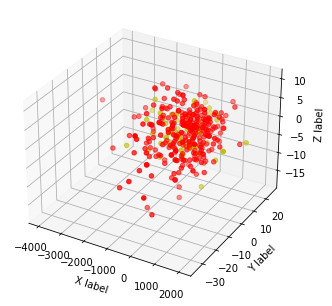

In [107]:
from mpl_toolkits.mplot3d import Axes3D
xs2,ys2,zs2=m[0],m[1],m[2]
xs3,ys3,zs3=f[0],f[1],f[2]


fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。

 # 画出(xs1,ys1,zs1)的散点图。
ax.scatter(xs2,ys2,zs2,c='r')
ax.scatter(xs3,ys3,zs3,c='y')

ax.set_xlabel('X label') # 画出坐标轴
ax.set_ylabel('Y label')
ax.set_zlabel('Z label')

plt.show()

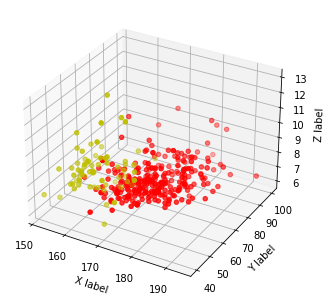

In [108]:
from mpl_toolkits.mplot3d import Axes3D
xs2,ys2,zs2=male_t[0],male_t[1],male_t[2]
xs3,ys3,zs3=female_t[0],female_t[1],female_t[2]


fig = plt.figure() # 创建一个画布figure，然后在这个画布上加各种元素。
ax = Axes3D(fig) # 将画布作用于 Axes3D 对象上。

 # 画出(xs1,ys1,zs1)的散点图。
ax.scatter(xs2,ys2,zs2,c='r')
ax.scatter(xs3,ys3,zs3,c='y')

ax.set_xlabel('X label') # 画出坐标轴
ax.set_ylabel('Y label')
ax.set_zlabel('Z label')

plt.show()